# OMP scalability plots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('../data/timings64000000.csv')
df.head()

,Size,Threads,Time
0,64000000,1,16.030418
1,64000000,1,16.017826
2,64000000,1,15.953701
3,64000000,1,15.962107
4,64000000,1,15.933373


In [4]:
# Calculate the mean time for each value of the 'Threads' column
mean_times = df.groupby('Threads')['Time'].mean().reset_index()
mean_times['Size'] = 64000000

print(mean_times)
type(mean_times)

    Threads       Time      Size
0         1  15.979485  64000000
1         2   8.627646  64000000
2         3   6.431597  64000000
3         4   5.839554  64000000
4         5   4.873381  64000000
..      ...        ...       ...
59       60   2.328247  64000000
60       61   2.025569  64000000
61       62   2.037720  64000000
62       63   2.013761  64000000
63       64   2.309608  64000000

[64 rows x 3 columns]


pandas.core.frame.DataFrame

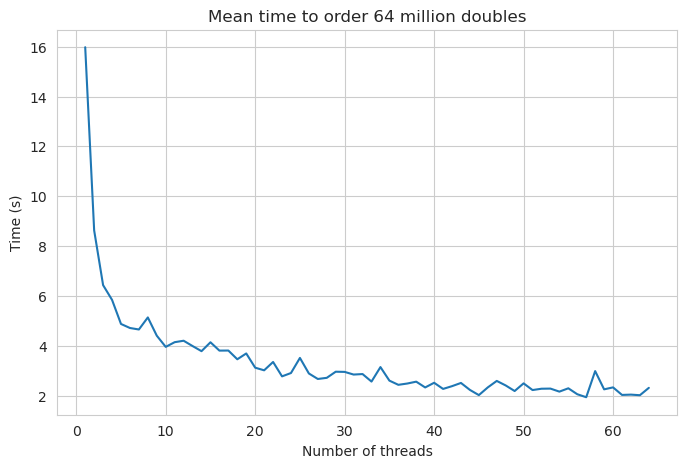

In [14]:
# Plot the mean times with seaborn

sns.set_style("whitegrid")
ax = sns.lineplot(x="Threads", y="Time", data=mean_times)
ax.set_title('Mean time to order 64 million doubles')
ax.set_xlabel('Number of threads')
ax.set_ylabel('Time (s)')

# Save the plot to a file

fig = plt.gcf()
fig.set_size_inches(8, 5)
fig.savefig('omp_timings.png', dpi=300)

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


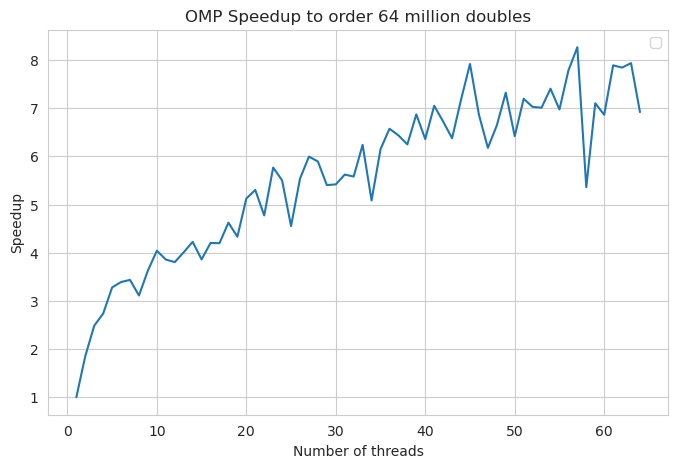

In [15]:
# Plot speedup
mean_times['Speedup'] = mean_times['Time'][0] / mean_times['Time']
ax = sns.lineplot(x=mean_times['Threads'], y=mean_times['Speedup'])
# Add a log_2 plot to the same graph
# x = np.linspace(1, mean_times['Threads'].max(), 100)
# y = np.log2(x) + np.ones(100)
# plt.plot(x, y, label='log2(Threads)', linestyle='--', color='red')

ax.set_title('OMP Speedup to order 64 million doubles')
ax.set_xlabel('Number of threads')
ax.set_ylabel('Speedup')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(8, 5)
fig.savefig('omp_speedup.png', dpi=300)

plt.show()

In [7]:
df1 = pd.read_csv('../data/timings240000000.csv')
df1.head()

,Size,Threads,Time
0,240000000,1,64.142704
1,240000000,1,63.959951
2,240000000,1,63.863609
3,240000000,1,64.059816
4,240000000,1,64.141183


In [8]:
mean_times1 = df1.groupby('Threads')['Time'].mean().reset_index()
# Keep the size column
mean_times1['Size'] = 240000000

print(mean_times1)
type(mean_times1)

    Threads       Time       Size
0         1  64.033453  240000000
1         2  35.841595  240000000
2         3  26.010964  240000000
3         4  22.855886  240000000
4         5  20.292169  240000000
..      ...        ...        ...
59       60   9.896915  240000000
60       61  10.480695  240000000
61       62   9.998467  240000000
62       63  10.153487  240000000
63       64  11.188124  240000000

[64 rows x 3 columns]


pandas.core.frame.DataFrame

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


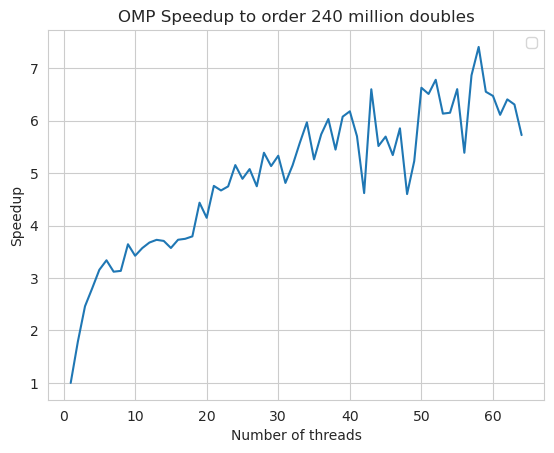

In [13]:
# Plot speedup
mean_times1['Speedup'] = mean_times1['Time'][0] / mean_times1['Time']
ax = sns.lineplot(x=mean_times1['Threads'], y=mean_times1['Speedup'])
# Add a log_2 plot to the same graph
# x = np.linspace(1, mean_times['Threads'].max(), 100)
# y = np.log2(x) + np.ones(100)
# plt.plot(x, y, label='log2(Threads)', linestyle='--', color='red')

ax.set_title('OMP Speedup to order 240 million doubles')
ax.set_xlabel('Number of threads')
ax.set_ylabel('Speedup')
plt.legend()
plt.show()

In [10]:
# Merge the two dataframes and plot the speedup
tot_mean_times = pd.concat([mean_times, mean_times1], axis=0)
tot_mean_times.head()

,Threads,Time,Size,Speedup
0,1,15.979485,64000000,1.000000
1,2,8.627646,64000000,1.852126
2,3,6.431597,64000000,2.484528
3,4,5.839554,64000000,2.736422
4,5,4.873381,64000000,3.278932


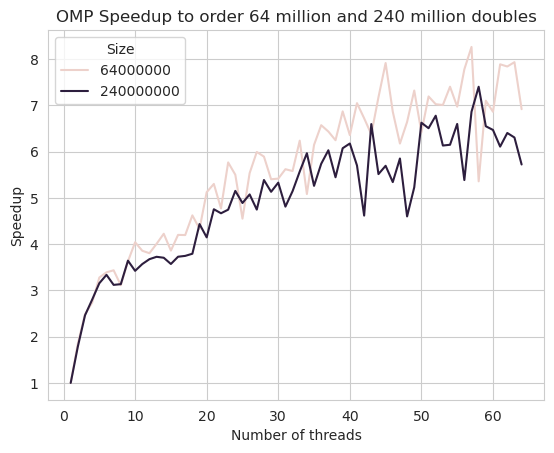

In [11]:
# Plot speedup
ax = sns.lineplot(x=tot_mean_times['Threads'], y=tot_mean_times['Speedup'], hue=tot_mean_times['Size'], color='red')

ax.set_title('OMP Speedup to order 64 million and 240 million doubles')
ax.set_xlabel('Number of threads')
ax.set_ylabel('Speedup')
plt.legend(title='Size')
plt.show()